In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [136]:
data=pd.read_csv('train.csv')

In [137]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [138]:
data.shape

(188533, 13)

In [139]:
data.isnull().sum().sort_values(ascending=False)

clean_title     21419
fuel_type        5083
accident         2452
id                  0
brand               0
model               0
model_year          0
milage              0
engine              0
transmission        0
ext_col             0
int_col             0
price               0
dtype: int64

Text(0, 0.5, 'Frequency')

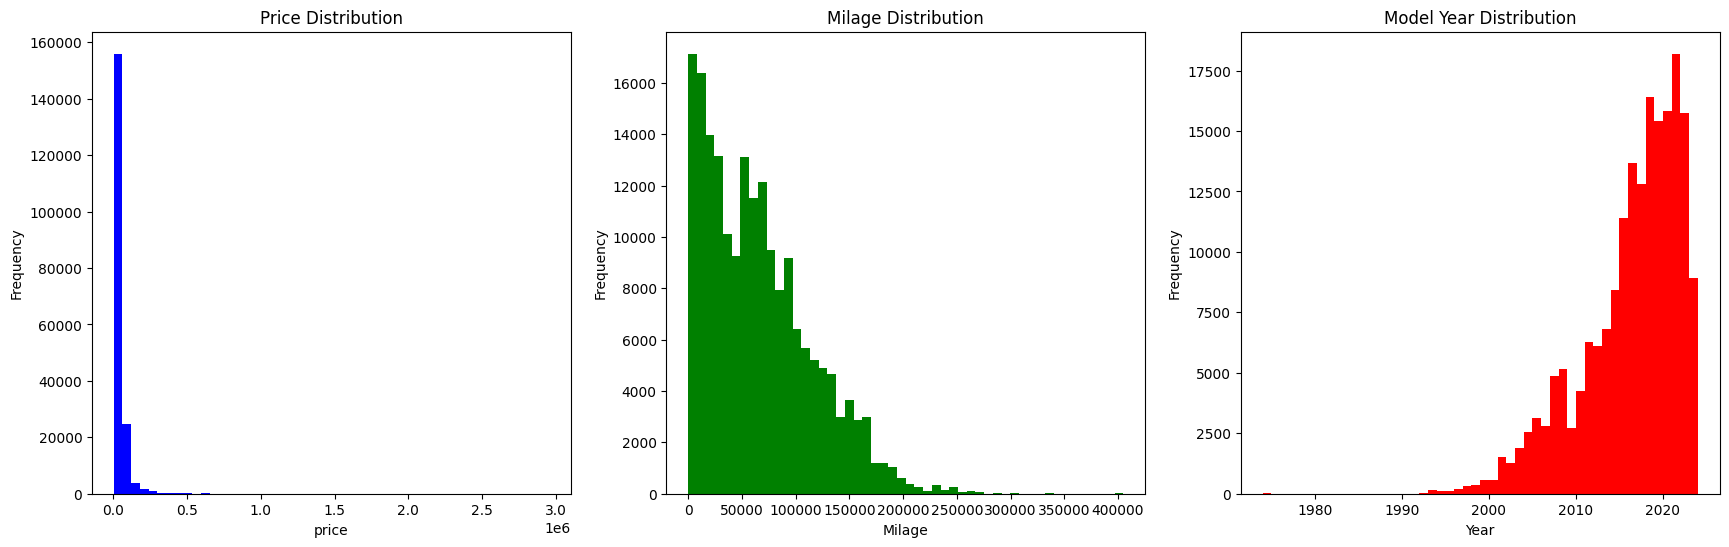

In [140]:
fig,ax=plt.subplots(1,3,figsize=(21,6))
ax[0].hist(data['price'],bins=50,color='blue')
ax[0].set_title('Price Distribution')
ax[0].set_xlabel('price')
ax[0].set_ylabel('Frequency')

ax[1].hist(data['milage'],bins=50,color='green')
ax[1].set_title('Milage Distribution')
ax[1].set_xlabel('Milage')
ax[1].set_ylabel('Frequency')

ax[2].hist(data['model_year'],bins=50,color='red')
ax[2].set_title('Model Year Distribution')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Frequency')

Text(0, 0.5, 'Price')

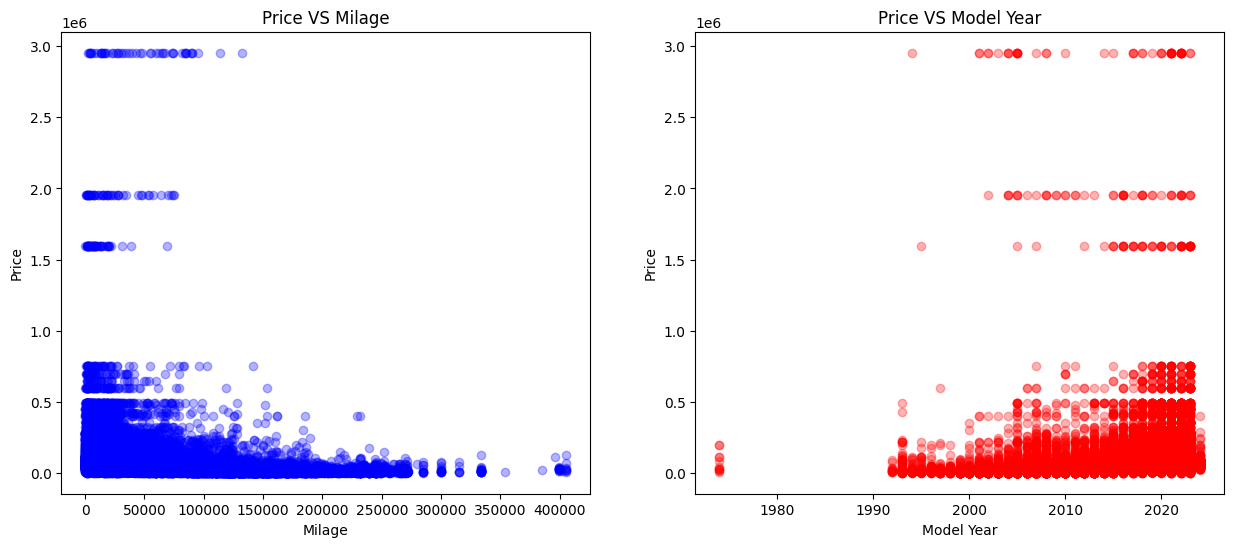

In [141]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
ax[0].scatter(data['milage'],data['price'],alpha=0.3,color='blue')
ax[0].set_title('Price VS Milage')
ax[0].set_xlabel('Milage')
ax[0].set_ylabel('Price')


ax[1].scatter(data['model_year'],data['price'],alpha=0.3,color='red')
ax[1].set_title('Price VS Model Year')
ax[1].set_xlabel('Model Year')
ax[1].set_ylabel('Price')

In [142]:
numerical_features=['milage','model_year','price']
data[numerical_features].corr()

,milage,model_year,price
milage,1.000000,-0.669936,-0.283067
model_year,-0.669936,1.000000,0.231795
price,-0.283067,0.231795,1.000000


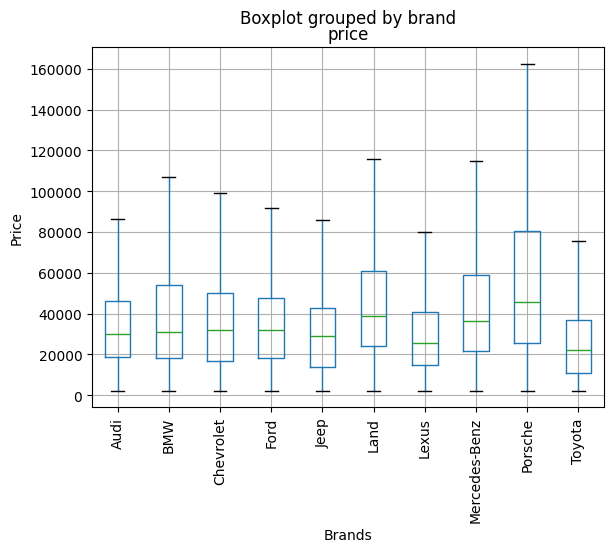

In [143]:
top_10_brands=data['brand'].isin(data['brand'].value_counts().head(10).index)
ax=data[top_10_brands].boxplot(column='price',by='brand',showfliers=False)
#ax.set_title('Price by Top 10 Brands')
ax.set_xlabel('Brands')
ax.set_ylabel('Price')
ax.tick_params(axis='x',rotation=90)

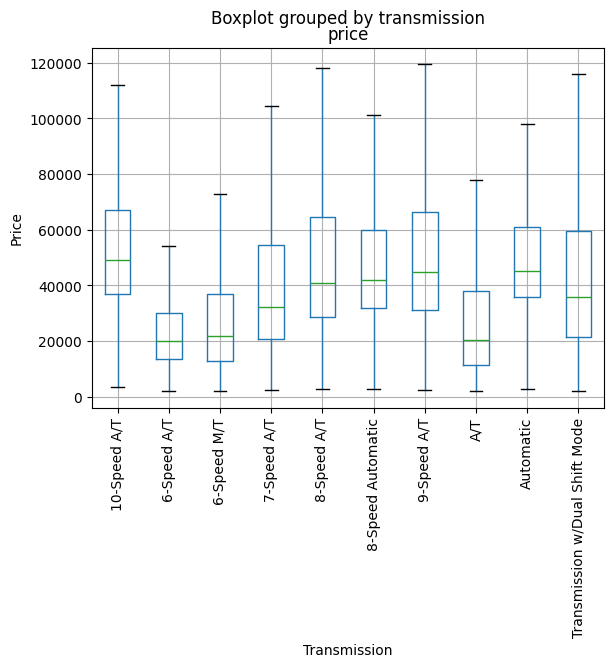

In [144]:

top_10_brands=data['transmission'].isin(data['transmission'].value_counts().head(10).index)
ax=data[top_10_brands].boxplot(column='price',by='transmission',showfliers=False)
ax.set_xlabel('Transmission')
ax.set_ylabel('Price')
ax.tick_params(axis='x',rotation=90)

<Axes: title={'center': 'price'}, xlabel='fuel_type'>

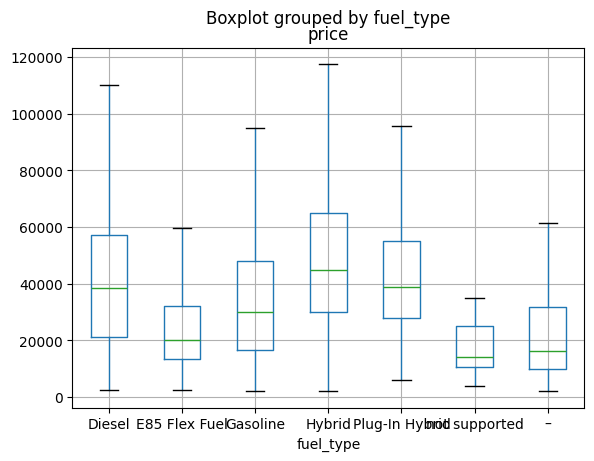

In [145]:
data.boxplot(column='price',by='fuel_type',showfliers=False)

<Axes: title={'center': 'price'}, xlabel='accident'>

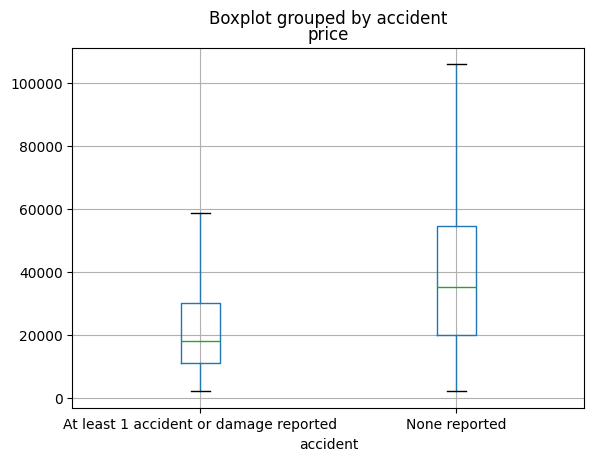

In [146]:
data.boxplot(column='price',by='accident',showfliers=False)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [148]:
categorical_cols=['brand','model','fuel_type','transmission','int_col','accident','clean_title']
dic_unq_vals={}
for i in categorical_cols:
    dic_unq_vals[i]=data[i].nunique()

In [149]:
dic_unq_vals

{'brand': 57,
 'model': 1897,
 'fuel_type': 7,
 'transmission': 52,
 'int_col': 156,
 'accident': 2,
 'clean_title': 1}

In [150]:
data.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900


In [151]:
import re
def extract_horsepower(engine_str):
    match=re.search(r'(\d+\.?\d*)HP', engine_str)
    if match:
        return float(match.group(1))
    else:
        return None

In [152]:
data['horsepower']=data['engine'].apply(extract_horsepower)

In [153]:
data[['engine','horsepower']].head()

,engine,horsepower
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,172.0
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,252.0
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,320.0
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,420.0
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,208.0


In [154]:
data['fuel_type'].fillna('Gasoline',inplace=True)
data['accident'].fillna('None reported',inplace=True)
data['clean_title'].fillna('Yes',inplace=True)

In [155]:
data['horsepower'].fillna(data['horsepower'].median(),inplace=True)

In [156]:
data.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
horsepower      0
dtype: int64

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
x=data.drop(columns=['price','id','engine'])
y=data['price']

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [159]:
categoric_cols=['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
numeric_cols=['model_year', 'milage', 'horsepower']

In [160]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb

In [161]:
preprocessor=ColumnTransformer(
    transformers=[
        ('numerical_features',StandardScaler(),numeric_cols),
        ('categorical_cols',OneHotEncoder(handle_unknown='ignore'),categoric_cols)
    ]
)

In [162]:
model=xgb.XGBRegressor(random_state=42)

In [163]:
model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

In [167]:
model_pipeline.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical_features', ...), ('categorical_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred_vals=model_pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred_vals,y_test)
print(rmse)

72930.5625


In [ ]:
preprocessor_2=ColumnTransformer(
    transformers=[
    ('numeric_features',StandardScaler(),numeric_cols),
    ('categorical_cols',OrdinalEncoder(),categoric_cols)
])

In [ ]:
model_Pipeline_2=Pipeline(steps=[
    ('preprocessor_2',preprocessor_2),
    ('model',model)
])

In [ ]:
model_Pipeline_2.fit(x_train,y_train)

,steps,"[('preprocessor_2', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric_features', ...), ('categorical_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred_vals_pl2=model_Pipeline_2.predict(x_test)

In [ ]:
root_mean_squared_error(y_pred_vals_pl2,y_test)

70142.4921875

In [ ]:
param_grid={
    'n_estimators':[100,200,500],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.05,0.1],
}

In [ ]:
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
    )